<a href="https://colab.research.google.com/github/sebasbrowar/ejercicios-python/blob/main/datos_con_pandas_SBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
from io import BytesIO

In [17]:
url = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/nacimientos/sinac_2023.zip?V=2024.05.14'

# Realizar la solicitud GET para descargar el archivo ZIP
respuesta = requests.get(url)

if respuesta.status_code == 200:
    # Extraer el contenido del archivo ZIP
    contenido_zip = zipfile.ZipFile(BytesIO(respuesta.content))

    # Lista los archivos dentro del archivo ZIP
    print(contenido_zip.namelist())

    # Cargar el archivo CSV desde el archivo ZIP
    with contenido_zip.open('Nacimientos_2023.csv') as archivo_csv:
        df_original = pd.read_csv(archivo_csv)

['Nacimientos_2023.csv']


In [45]:
# Analizamos el dataframe
df_original

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,2,9,12,25,2,2,23/07/1997,5,2,9,...,11.0,9,10,1,1,NaN,9,10,1,09/05/2023
1,2,15,33,22,2,2,11/05/2000,5,2,9,...,11.0,9,5,1,1,NaN,9,5,1,28/02/2023
2,2,12,28,20,1,1,12/08/2002,4,2,12,...,14.0,12,28,1,2,NaN,12,28,1,17/06/2023
3,2,13,63,28,2,2,24/12/1994,4,2,13,...,11.0,13,63,1,1,NaN,13,63,1,21/11/2023
4,2,15,101,29,2,2,23/05/1993,4,2,15,...,11.0,15,54,35,1,NaN,15,54,35,08/05/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521275,2,9,15,23,2,2,18/12/1999,4,2,9,...,11.0,9,15,1,2,DFSSA003973,9,15,1,20/11/2023
1521276,2,15,40,16,2,2,11/02/2007,4,2,15,...,11.0,15,40,13,2,MCSSA010251,15,40,13,15/08/2023
1521277,2,8,19,21,2,2,06/07/2002,1,2,8,...,11.0,8,19,1,2,CHSMP000066,8,19,1,27/11/2023
1521278,2,14,114,36,2,2,11/08/1987,5,2,25,...,11.0,25,1,1,7,SLSSA000024,25,1,1,21/11/2023


In [46]:
# Para ver todas las columnas usamos .columns
columnas = df_original.columns

# Mostrar los nombres de todas las columnas
print("Nombres de las columnas:")
print(columnas)

Nombres de las columnas:
Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'L

In [47]:
# Al ser muchas variables, eliminare algunas y creare un nuevo dataframe

columnas_del = ['NACIOEXTRANJERO', 'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE', 'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS', 'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES', 'CONDICIONHIJOANTERIOR',
       'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO', 'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS', 'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD',
        'INTERRUMPIOESTUDIOS', 'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO', 'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'CLUES', 'TIEMPOTRASLADO', 'RESOLUCIONEMBARAZO', 'UTILIZOFORCEPS', 'TIPOCESAREA', 'PERSONALATENDIO', 'TIPOMEDICOATENDIO',
       'CERTIFICADOPOR', 'CLUESCERTIFICA', 'ENTIDADFEDERATIVACERTIFICA', 'MUNICIPIOCERTIFICA', 'LOCALIDADCERTIFICA', 'FECHACERTIFICADO']
df_mod = df_original.drop(columns=columnas_del)

In [48]:
df = df_mod
df

,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,FECHANACIMIENTO,HORANACIMIENTO,SEXO,EDADGESTACIONAL,TALLA,PESO,LUGARNACIMIENTO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO
0,9,12,25,09/05/2023,22:38,2,41,49,9999,4,9,10,1
1,15,33,22,28/02/2023,09:18,1,40,50,3060,3,9,5,1
2,12,28,20,17/06/2023,11:15,2,38,50,2850,1,12,28,1
3,13,63,28,21/11/2023,08:26,2,40,51,3490,9,13,63,1
4,15,101,29,08/05/2023,23:20,1,41,52,3680,3,15,54,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521275,9,15,23,18/11/2023,12:13,2,39,51,2680,1,9,15,1
1521276,15,40,16,14/08/2023,12:00,1,39,55,3750,1,15,40,13
1521277,8,19,21,26/11/2023,11:49,1,38,51,3570,9,8,19,1
1521278,14,114,36,18/11/2023,12:01,1,36,44,2100,1,25,1,1


In [49]:
# Combinamos las columnas 'FECHANACIMIENTO' y '	HORANACIMIENTO' en una sola columna 'FECHA_HORA'
df['FECHA_HORA'] = df.apply(lambda row: row['FECHANACIMIENTO'] + ' ' + row['HORANACIMIENTO'], axis=1)

# Convierte la columna 'FECHA_HORA' al tipo datetime
df['FECHA_HORA'] = pd.to_datetime(df['FECHA_HORA'], format='%d/%m/%Y %H:%M')

# Hacemos que la columna FECHA_HORA sea el indice, sin crear un nuevo dataframe
df.set_index('FECHA_HORA', inplace=True)

In [50]:
df

,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,FECHANACIMIENTO,HORANACIMIENTO,SEXO,EDADGESTACIONAL,TALLA,PESO,LUGARNACIMIENTO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO
FECHA_HORA,,,,,,,,,,,,,
2023-05-09 22:38:00,9,12,25,09/05/2023,22:38,2,41,49,9999,4,9,10,1
2023-02-28 09:18:00,15,33,22,28/02/2023,09:18,1,40,50,3060,3,9,5,1
2023-06-17 11:15:00,12,28,20,17/06/2023,11:15,2,38,50,2850,1,12,28,1
2023-11-21 08:26:00,13,63,28,21/11/2023,08:26,2,40,51,3490,9,13,63,1
2023-05-08 23:20:00,15,101,29,08/05/2023,23:20,1,41,52,3680,3,15,54,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-18 12:13:00,9,15,23,18/11/2023,12:13,2,39,51,2680,1,9,15,1
2023-08-14 12:00:00,15,40,16,14/08/2023,12:00,1,39,55,3750,1,15,40,13
2023-11-26 11:49:00,8,19,21,26/11/2023,11:49,1,38,51,3570,9,8,19,1


In [51]:
# Ya con el indice listo, eliminamos las columnas FECHANACIMIENTO y HORANACIMIENTO

columnas_del = ['FECHANACIMIENTO', 'HORANACIMIENTO']

df = df.drop(columns=columnas_del)

In [52]:
df

,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SEXO,EDADGESTACIONAL,TALLA,PESO,LUGARNACIMIENTO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO
FECHA_HORA,,,,,,,,,,,
2023-05-09 22:38:00,9,12,25,2,41,49,9999,4,9,10,1
2023-02-28 09:18:00,15,33,22,1,40,50,3060,3,9,5,1
2023-06-17 11:15:00,12,28,20,2,38,50,2850,1,12,28,1
2023-11-21 08:26:00,13,63,28,2,40,51,3490,9,13,63,1
2023-05-08 23:20:00,15,101,29,1,41,52,3680,3,15,54,35
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-18 12:13:00,9,15,23,2,39,51,2680,1,9,15,1
2023-08-14 12:00:00,15,40,16,1,39,55,3750,1,15,40,13
2023-11-26 11:49:00,8,19,21,1,38,51,3570,9,8,19,1


In [55]:
# Hacemos que el dataframe solo tengas partos en sonora (entidad federativa = 26)
df = df.loc[df['ENTIDADFEDERATIVAPARTO'] == 26]

In [56]:
df

,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SEXO,EDADGESTACIONAL,TALLA,PESO,LUGARNACIMIENTO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO
FECHA_HORA,,,,,,,,,,,
2023-06-19 11:59:00,12,74,26,2,40,53,3400,1,26,29,1
2023-06-17 16:09:00,26,29,19,1,36,47,2500,1,26,29,1
2023-04-10 16:29:00,26,18,17,1,37,48,2320,1,26,18,1
2023-03-09 10:46:00,26,36,32,1,40,53,3795,1,26,36,1
2023-08-30 08:35:00,26,30,28,1,38,50,3370,9,26,30,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07 15:35:00,26,19,33,2,38,49,2830,9,26,30,1
2023-11-24 20:17:00,26,18,20,1,37,48,2605,3,26,18,1
2023-11-15 08:55:00,26,18,35,2,39,50,3300,8,26,18,1


In [66]:
# Reemplazamos los valores = 9999 para que sean null
df['PESO'] = df['PESO'].replace(9999, np.nan)

<ipython-input-66-f258ead74059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PESO'] = df['PESO'].replace(9999, np.nan)


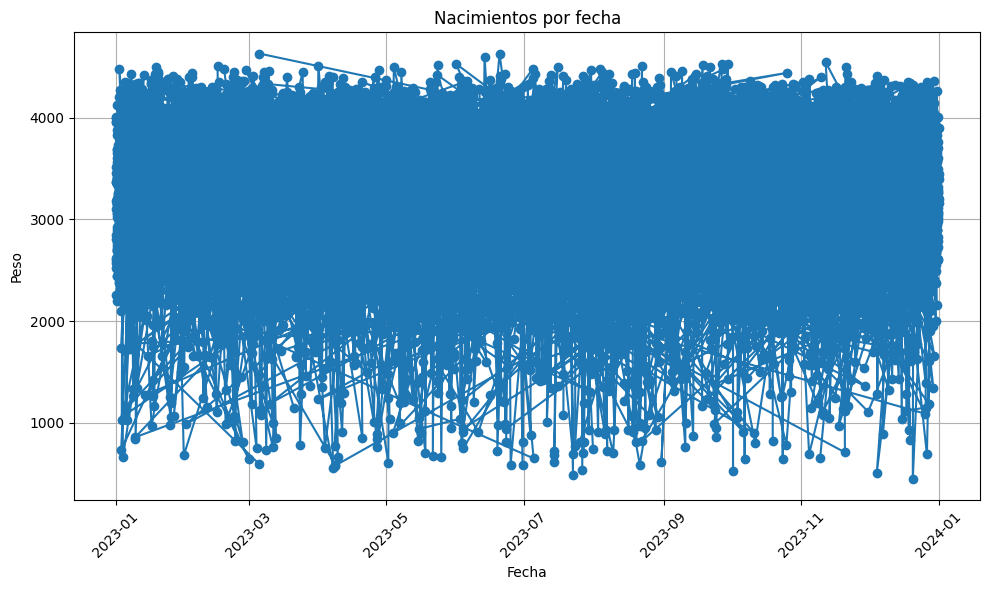

In [68]:
# Grafica para ver el rango de pesos de los nacimientos
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PESO'], marker='o', linestyle='-')
plt.title('Nacimientos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Peso')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

Podemos observar en la grafica que la mayoría de los pesos se encuentran entre 2000gr y 4000gr, y que hay algunas casos bastante extremos en los que hay nacimientos que tienen un peso menor a 1000gr.
También podríamos obtener más información con estos datos como cuantos nacimientos ha habido por estado, la edad de las madres al parir, información sobre los generos, las tallas de los bebés, etc.

Lamentablemente no tuve el tiempo para poder desarrollar más gráficas, tampoco considero que aun tengo el conocimiento pero siempre me puedo apoyar al buscar en internet, por lo que tengo planeado continuar este análisis eventualmente.